In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,ConvLSTM2D,LSTM,Reshape
from keras import backend as K
from tensorflow.keras.layers import MaxPooling3D,Conv3D,Conv3DTranspose
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import backend as K
import keras 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_directory='/content/drive/MyDrive/rgb_indv'
mask_directory='/content/drive/MyDrive/masks'

In [4]:
SIZE = 512
image_dataset = []  
mask_dataset = [] 

In [5]:
path=['/content/drive/MyDrive/areas_rgb/abukebir/Pair1',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair2',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair3',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair4',
  '/content/drive/MyDrive/areas_rgb/annubariyah/Pair1',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair2',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair1',
 '/content/drive/MyDrive/areas_rgb/banha/Pair2',
 '/content/drive/MyDrive/areas_rgb/banha/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair4',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair1',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair2',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair3',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair4',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair1',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair2',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair3',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair4',
  '/content/drive/MyDrive/areas_rgb/blbes/Pair1',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair2',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair1',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair2',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair4',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair1',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair2',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair3',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair4',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair1',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair2',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair3',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair4',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair1',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair2',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair3',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair4',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair1',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair2',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair3',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair4',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair1',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair2',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair3',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair4',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair1',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair2',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair3',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair4',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair1',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair2',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair3',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair4',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair1',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair2',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair3',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair4',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair1',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair2',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair3',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair4',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair1',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair2',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair3',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair4',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair1',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair2',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair3',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair4',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair1',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair2',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair3',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair4',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair1',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair2',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair3',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair4']

labels=[
 '/content/drive/MyDrive/Labels/abukebir',
   '/content/drive/MyDrive/Labels/annubariyah',
 '/content/drive/MyDrive/Labels/banha',
 '/content/drive/MyDrive/Labels/beheira_etay',
 '/content/drive/MyDrive/Labels/beheria_qarya',
 '/content/drive/MyDrive/Labels/bishla',
 '/content/drive/MyDrive/Labels/biyla',
  '/content/drive/MyDrive/Labels/blbes',
 '/content/drive/MyDrive/Labels/damanhour',
 '/content/drive/MyDrive/Labels/damietta',
 '/content/drive/MyDrive/Labels/elkasasin',
 '/content/drive/MyDrive/Labels/fayoum',
 '/content/drive/MyDrive/Labels/gamaleya',
 '/content/drive/MyDrive/Labels/geiza',
 '/content/drive/MyDrive/Labels/housh_eissa',
 '/content/drive/MyDrive/Labels/kafr_eldawar',
 '/content/drive/MyDrive/Labels/kafr_elsheikh',
 '/content/drive/MyDrive/Labels/mansoura',
 '/content/drive/MyDrive/Labels/mutubas',
 '/content/drive/MyDrive/Labels/north_cairo',
 '/content/drive/MyDrive/Labels/portsaid',
 '/content/drive/MyDrive/Labels/sadat_city',
 '/content/drive/MyDrive/Labels/sharqia',
 '/content/drive/MyDrive/Labels/tanta']

In [6]:
def load_data():
  dataset={}
  for i in range(len(labels)):
    city=labels[i].split('/')[-1]
    for x in sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/')):
      pairs=sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/'))
      im=['/content/drive/MyDrive/areas_rgb/'+city+'/' + p for p in pairs]
      cmap= ['/content/drive/MyDrive/Labels/'+city+'/'+x for x in sorted(os.listdir('/content/drive/MyDrive/Labels/'+city))]
      images=[]
      for y in range(len(im)):
        images=[im[y]+'/'+x for x in sorted(os.listdir(im[y]))]
        dataset[city+str(y+1)]={'images':images, 'label': cmap[y]+ '/'+  os.listdir(cmap[y])[0]}
  return dataset  
ds=load_data()

In [7]:
ds['mansoura1']['images'][0]

'/content/drive/MyDrive/areas_rgb/mansoura/Pair1/1984.png'

In [8]:
im1=[];mask_dataset=[];im2=[]
for i in ds.keys():
  image1=cv2.imread(ds[i]['images'][0])
  image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
  image1=Image.fromarray(image1)
  image1=image1.resize((SIZE,SIZE))
  image2=cv2.imread(ds[i]['images'][1])
  image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
  image2=Image.fromarray(image2)
  image2=image2.resize((SIZE,SIZE))
  image3=cv2.imread(ds[i]['label'],0)
  _,image3=cv2.threshold(image3,0,255,cv2.THRESH_TOZERO)
  image3=Image.fromarray(image3)
  image3=image3.resize((SIZE,SIZE))
  im1.append(np.array(image1)/255.0)
  im2.append(np.array(image2)/255.0)
  mask_dataset.append(np.array(image3)/255.0)

In [9]:
im1=np.array(im1)
im2=np.array(im2)

In [10]:
im1.shape

(94, 512, 512, 3)

In [11]:
im2.shape

(94, 512, 512, 3)

In [12]:
#concat
im=np.concatenate((im1,im2),axis=3)

In [13]:
im.shape

(94, 512, 512, 6)

In [14]:
mask_dataset =np.expand_dims(np.array(mask_dataset),3)

In [15]:
mask_dataset.shape

(94, 512, 512, 1)

In [16]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [17]:
def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [18]:
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [19]:
!pip install segmentation_models 

     |████████████████████████████████| 51kB 7.6MB/s 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(im, mask_dataset, test_size = 0.2, random_state = 0,shuffle=True)

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0,shuffle=True)

In [22]:
X_train.shape

(75, 512, 512, 6)

In [23]:
X_val.shape

(9, 512, 512, 6)

In [24]:
X_test.shape

(10, 512, 512, 6)

In [25]:
y_test.shape

(10, 512, 512, 1)

In [26]:
y_train.shape

(75, 512, 512, 1)

In [27]:
y_val.shape

(9, 512, 512, 1)

In [30]:
del ds,im,mask_dataset,data,mask

NameError: ignored

In [31]:
del im1,im2

NameError: ignored

In [32]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [33]:
from segmentation_models import Unet

Segmentation Models: using `tf.keras` framework.


In [34]:
import segmentation_models as sm

In [35]:
m=sm.Unet('inceptionv3', input_shape=(None, None, 6), encoder_weights=None)

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  str(input_shape[-1]) + ' input channels.')


In [36]:
m.compile('Adam', loss=dice_coef_loss, metrics=['accuracy',dice_coef,jacard_coef])

In [37]:
h=m.fit(X_train, y_train,  batch_size =16,  verbose=2,   epochs=400 , validation_data=(X_val, y_val))

Epoch 1/400
5/5 - 35s - loss: 0.7583 - accuracy: 0.5633 - dice_coef: 0.2420 - jacard_coef: 0.1383 - val_loss: 0.8347 - val_accuracy: 0.4822 - val_dice_coef: 0.1653 - val_jacard_coef: 0.0901
Epoch 2/400
5/5 - 2s - loss: 0.6946 - accuracy: 0.6349 - dice_coef: 0.3030 - jacard_coef: 0.1791 - val_loss: 0.8355 - val_accuracy: 0.7605 - val_dice_coef: 0.1645 - val_jacard_coef: 0.0896
Epoch 3/400
5/5 - 2s - loss: 0.6661 - accuracy: 0.6537 - dice_coef: 0.3360 - jacard_coef: 0.2030 - val_loss: 0.8307 - val_accuracy: 0.0730 - val_dice_coef: 0.1693 - val_jacard_coef: 0.0925
Epoch 4/400
5/5 - 2s - loss: 0.6500 - accuracy: 0.6692 - dice_coef: 0.3485 - jacard_coef: 0.2124 - val_loss: 0.8252 - val_accuracy: 0.0754 - val_dice_coef: 0.1748 - val_jacard_coef: 0.0958
Epoch 5/400
5/5 - 2s - loss: 0.6367 - accuracy: 0.6614 - dice_coef: 0.3570 - jacard_coef: 0.2195 - val_loss: 0.8239 - val_accuracy: 0.0610 - val_dice_coef: 0.1761 - val_jacard_coef: 0.0966
Epoch 6/400
5/5 - 2s - loss: 0.6083 - accuracy: 0.7152

In [38]:
m.evaluate(X_test,y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.3802 - accuracy: 0.8293 - dice_coef: 0.6198 - jacard_coef: 0.4491


[0.38017839193344116,
 0.8292987942695618,
 0.6198216080665588,
 0.4490888714790344]

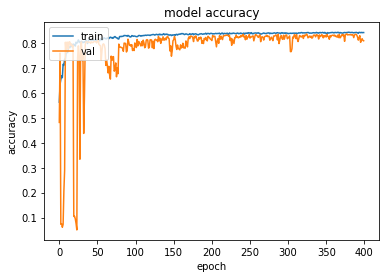

<Figure size 432x288 with 0 Axes>

In [40]:
import keras
from matplotlib import pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("accuracy.png")

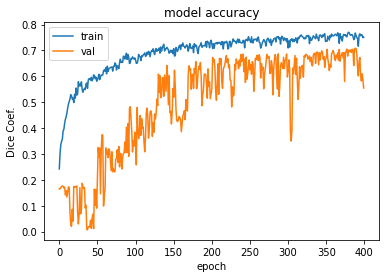

<Figure size 432x288 with 0 Axes>

In [41]:
import keras
from matplotlib import pyplot as plt
plt.plot(h.history['dice_coef'])
plt.plot(h.history['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('Dice Coef.')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("dice_coef.png")

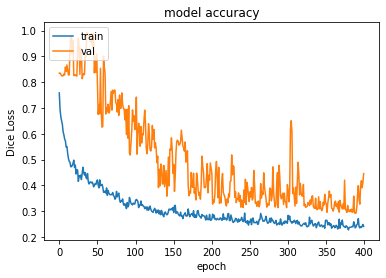

<Figure size 432x288 with 0 Axes>

In [42]:
import keras
from matplotlib import pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Dice Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("loss.png")

In [46]:
from keras.utils import plot_model
plot_model(m,to_file="unet_inceptionv3.png")

Output hidden; open in https://colab.research.google.com to view.

In [48]:
m.save('unet_inceptionv3.h5')